In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
FILE = "merged1.csv"
df = pd.read_csv(FILE)

df['manual_ratio'] = df['Radius'] / df['Droplet_r']
df['machine_ratio'] = df['beadR'] / df['dropR']
df['rad_error'] = abs(df['manual_ratio'] - df['machine_ratio'])
df['theta_err'] = abs(df['Theta'] - df['beadTheta']) / 360

df.head()

,FRR,Filename_x,Chunk Number,Peak Height,Bead_number,Droplet_r,bead_d,adjusted_drop_r,Radius,Theta,...,i,Filename_y,IDD,dropR,beadR,beadTheta,manual_ratio,machine_ratio,rad_error,theta_err
0,10,10.0_0818_r1_poutput_data10.csv,32,0.320,39,25.166878,13.96,51.37,14.724580,104.035300,...,51,1_0818_r1_o10_b39.mp4,10.9,5.0,3,180.0,0.585078,0.6,0.014922,0.211013
1,10,10.0_0818_r1_poutput_data11.csv,1,20.311,6,25.166878,13.96,51.37,17.857000,216.873106,...,28,1_0818_r1_o11_b6.mp4,12.1,5.0,4,213.7,0.709544,0.8,0.090456,0.008814
2,10,10.0_0818_r1_poutput_data12.csv,28,17.910,16,24.346889,13.96,49.73,6.438128,146.312401,...,71,1_0818_r1_o12_b16.mp4,13.2,5.0,3,45.0,0.264433,0.6,0.335567,0.281423
3,10,10.0_0818_r1_poutput_data12.csv,6,10.436,22,24.346889,13.96,49.73,13.000353,344.052183,...,17,1_0818_r1_o12_b22.mp4,11.9,5.0,3,0.0,0.533964,0.6,0.066036,0.955701
4,10,10.0_0818_r1_poutput_data12.csv,17,0.395,36,25.166878,13.96,51.37,15.972234,296.565051,...,16,1_0818_r1_o12_b36.mp4,15.2,5.0,4,243.4,0.634653,0.8,0.165347,0.147681


In [27]:
Len = len(df)
# cumulative error distribution
# i.e curve of tol vs counts of error
tol_range = np.arange(0, 1.01, 0.01)
rad_counts = []
theta_counts = []

for tol in tol_range:
    r_count = len(df[df['rad_error'] < tol])/Len
    t_count = len(df[df['theta_err'] < tol])/Len

    rad_counts.append(round(r_count, 3))
    theta_counts.append(round(t_count, 3))

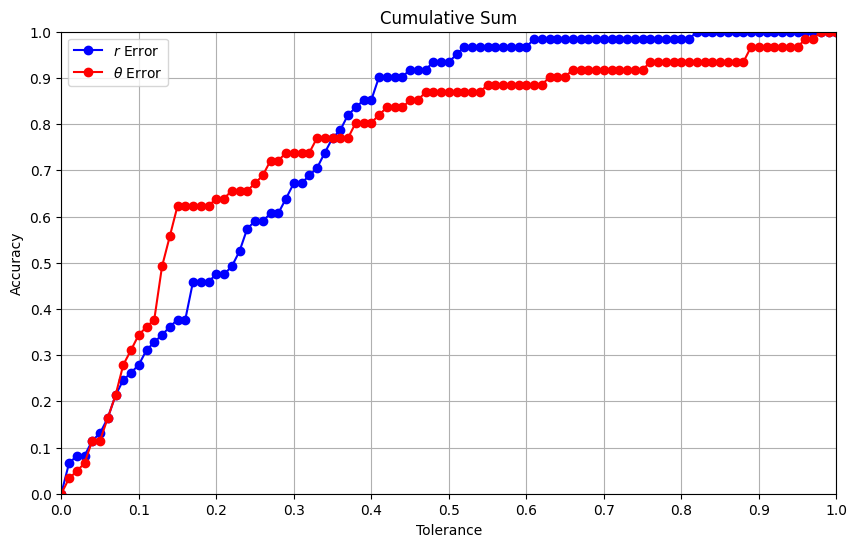

In [30]:
# plotting
plt.figure(figsize=(10, 6))

plt.plot(tol_range, rad_counts, marker='o', linestyle='-', color='b', label='$r$ Error')
plt.plot(tol_range, theta_counts, marker='o', linestyle='-', color='r', label='$\\theta$ Error')

plt.title('Cumulative Sum')
plt.xlabel('Tolerance')
plt.ylabel('Accuracy')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.show()